# Khipus.ai
## Introduction to Machine Learning
### Supervised Learning - Logistic Regression
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>

### Case Study: Titanic


## Assignment Instructions
Using the Titanic dataset provided:
1. Import the Titanic.csv file into a pandas dataframe
2. Perform a detailed data exploration.
3. Clean the dataset by addressing missing values.
4. Select relevant features for predicting survival.
5. Split the dataset into training and testing sets (80%-20% split).
6. Use Logistic regression model to predict the survivors

## 1. Import the Titanic dataset

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [2]:


# Your code here

# Load the Titanic dataset
titanic_df = pd.read_csv('Titanic.csv')

## 2. Data Exploration
Before working with the dataset, it's important to understand its structure, data types, and summary statistics. Below are examples of how to explore the data.


In [3]:

# Your code here

# Display the first few rows of the dataset
titanic_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:

# Display summary statistics
titanic_df.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# Check for missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3. Data Cleaning (addressing missing values)
Real-world datasets often contain missing values, duplicate rows, or incorrect data. Cleaning the data ensures its quality and usability for analysis.


In [6]:

# Fill missing 'Age' with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' as it has too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Your code here
# Confirm there are no missing values left
titanic_df.isnull().sum()


C:\Users\admin2024\AppData\Local\Temp\2\ipykernel_10724\3616995804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\admin2024\AppData\Local\Temp\2\ipykernel_10724\3616995804.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

## Feature Selection 
To build an effective machine learning model, selecting relevant features is crucial. 
Select relevant features for predicting survival.


In [7]:


# Perform one-hot encoding on 'Sex' and 'Embarked' columns
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Define the features you want to use
# Select features and target
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

# Your code here
# Select the features from the DataFrame
X = titanic_df[features]  # Features

# Select the target variable from the DataFrame
y = titanic_df['Survived']  # Target variable




## 5. Splitting Training and Test Data

In [8]:
# Your code here
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 

## 6. Use a logistic regression model to predict the survivors

When working with datasets, it's common to encounter missing values. These missing values can cause issues with many machine learning algorithms, which often require complete data to function correctly. To handle missing values effectively, we can use an imputer. The provided code demonstrates how to use the SimpleImputer from the sklearn.impute module to replace missing values with the mean of the respective column.

In [9]:
# Instantiate the imputer with the strategy to replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform it, replacing missing values with the mean
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the same imputer, ensuring consistency in handling missing values
X_test_imputed = imputer.transform(X_test)

### Train the Model
We will train a logistic regression model using the training data.

### What is max_iter?

It's a parameter in scikit-learn's LogisticRegression

Controls maximum number of iterations for solver to converge

Default value is 100

Higher values allow more time to find optimal solution

Why it matters:

Too few iterations → model may not converge

Too many iterations → longer training time

### Common values:

Simple datasets: 100-500

Complex datasets: 1000-5000

Very complex: 10000+

In [10]:
# Initialize the model
model = LogisticRegression(max_iter=1000)
# Train the model
model.fit(X_train_imputed, y_train)

LogisticRegression(max_iter=1000)

### Evaluate the Model
We'll calculate the mean squared error to evaluate the model performance.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the logistic regression model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_imputed, y_train)

# Make predictions
y_pred = model.predict(X_test_imputed)

# Calculate accuracy
accuracy = model.score(X_test_imputed, y_test)

# Calculate and print evaluation metrics

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Confusion Matrix:
[[50  0]
 [ 0 34]]


c:\Users\admin2024\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


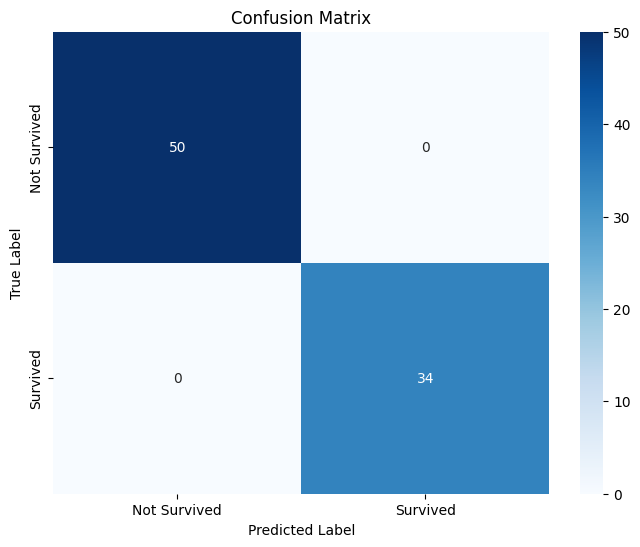

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [14]:
# True Negatives (TN): 50 - correctly predicted as not survived
# True Positives (TP): 34 - correctly predicted as survived
# False Positives (FP): 0 - incorrectly predicted as survived
# False Negatives (FN): 0 - incorrectly predicted as not survived

print(f"True Negatives (TN): {cm[0,0]}")
print(f"True Positives (TP): {cm[1,1]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")

True Negatives (TN): 50
True Positives (TP): 34
False Positives (FP): 0
False Negatives (FN): 0
